<a href="https://colab.research.google.com/github/psGitOrange/Netflix-TVShows-Data-Analysis/blob/main/netflixDataAnalysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# EDA: Netflix data insights 2024
### **About NETFLIX**
<img src="https://help.nflxext.com/0af6ce3e-b27a-4722-a5f0-e32af4df3045_what_is_netflix_5_en.png" alt="netflix_img" width="1280" height="458">


**Netflix** is one of the most popular media and **video streaming platform**. They have over `10000` movies or tv shows available on their platform, as of mid-2021, they have over `222M` Subscribers `globally`. This tabular dataset consists of listings of all the movies and tv shows available on Netflix, along with details such as - `cast, directors, ratings, release year, duration, etc`.

**Business problem statement:**

`Explore` the data and derive `insights` to assist Netflix in determining which **types of shows or movies** to produce and strategies to expand their **business in various countries**.

I have downloaded the dataset from this url [Netflix Dataset](https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/000/940/original/netflix.csv)

It is also hosted on kaggle datasets [Netflix Movies and TV Shows](https://www.kaggle.com/datasets/shivamb/netflix-shows)

In this EDA project we will be doing the following:
- Load dataset and understand basic representation of data
- Preprocess dataset with pandas along with unnesting.
- Exploratory data analysis(EDA) on TV shows, Movies, Countries, etc.
- Business insights
- Recommend actionable items for business


In [ ]:
# Data processing
import pandas as pd
import numpy as np

In [ ]:
# Visualization tools
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from wordcloud import WordCloud

In [ ]:
#Let us load Netflix dataset
netflix_df = pd.read_csv('netflix.csv')
netflix_df

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...
...,...,...,...,...,...,...,...,...,...,...,...,...
8802,s8803,Movie,Zodiac,David Fincher,"Mark Ruffalo, Jake Gyllenhaal, Robert Downey J...",United States,"November 20, 2019",2007,R,158 min,"Cult Movies, Dramas, Thrillers","A political cartoonist, a crime reporter and a..."
8803,s8804,TV Show,Zombie Dumb,NaN,NaN,NaN,"July 1, 2019",2018,TV-Y7,2 Seasons,"Kids' TV, Korean TV Shows, TV Comedies","While living alone in a spooky town, a young g..."
8804,s8805,Movie,Zombieland,Ruben Fleischer,"Jesse Eisenberg, Woody Harrelson, Emma Stone, ...",United States,"November 1, 2019",2009,R,88 min,"Comedies, Horror Movies",Looking to survive in a world taken over by zo...
8805,s8806,Movie,Zoom,Peter Hewitt,"Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...",United States,"January 11, 2020",2006,PG,88 min,"Children & Family Movies, Comedies","Dragged from civilian life, a former superhero..."


**Basic info of the data**

In [ ]:
netflix_df.shape

(8807, 12)

In [ ]:
netflix_df.isna().sum()

show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64

In [ ]:
netflix_df.columns

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description'],
      dtype='object')

In [ ]:
netflix_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


- Dataframe contains 12 features columns with 8807 entries of netflix movies and TV Shows data.
- There are missing values in categorical data such as director, cast & country.
- Count of null values show lot of missing director names.
- Data added, release year and duration also has missing values

## Preprocessing
First of all lets get the `date_added` column to `datetime` datatype, it currently has string and NaN values, so that later we can get Day, Week and Month values form it.

In [ ]:
value_type = netflix_df['date_added'].apply(type)
value_type.unique()

array([<class 'str'>, <class 'float'>], dtype=object)

In [ ]:
netflix_df['date_added'] = netflix_df['date_added'].apply(lambda x: x.strip() if isinstance(x,str) else x)

In [ ]:
netflix_df['date_added'] = pd.to_datetime(netflix_df['date_added'])
netflix_df.sample(4)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
5427,s5428,Movie,What the Health,"Kip Andersen, Keegan Kuhn",NaN,United States,2017-06-16,2017,TV-PG,92 min,Documentaries,This film examines the link between diet and d...
3841,s3842,Movie,Wine Country,Amy Poehler,"Amy Poehler, Maya Rudolph, Ana Gasteyer, Rache...",United States,2019-05-10,2019,R,104 min,Comedies,When longtime friends meet up for a wine-soake...
5209,s5210,Movie,One of Us,"Heidi Ewing, Rachel Grady",NaN,United States,2017-10-20,2017,TV-14,95 min,Documentaries,"In the wake of trauma and abuse, three Hasidic..."
2677,s2678,Movie,"Hail, Caesar!","Ethan Coen, Joel Coen","Josh Brolin, George Clooney, Scarlett Johansso...","United States, United Kingdom, Japan",2020-04-16,2016,PG-13,106 min,Comedies,When a major star is kidnapped from a movie se...


### Handling Missing Values

We will be looking at the missing values identified earlier, which include categorical, datetime, and numerical data.

First, we will address the missing values in the `date_added` columns using the `is_na` function. Here, we can see that all the missing values are from TV shows. Let's further analyze if we can safely remove this data.



In [ ]:
netflix_df[netflix_df['date_added'].isna()]

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
6066,s6067,TV Show,A Young Doctor's Notebook and Other Stories,NaN,"Daniel Radcliffe, Jon Hamm, Adam Godley, Chris...",United Kingdom,NaT,2013,TV-MA,2 Seasons,"British TV Shows, TV Comedies, TV Dramas","Set during the Russian Revolution, this comic ..."
6174,s6175,TV Show,Anthony Bourdain: Parts Unknown,NaN,Anthony Bourdain,United States,NaT,2018,TV-PG,5 Seasons,Docuseries,This CNN original series has chef Anthony Bour...
6795,s6796,TV Show,Frasier,NaN,"Kelsey Grammer, Jane Leeves, David Hyde Pierce...",United States,NaT,2003,TV-PG,11 Seasons,"Classic & Cult TV, TV Comedies",Frasier Crane is a snooty but lovable Seattle ...
6806,s6807,TV Show,Friends,NaN,"Jennifer Aniston, Courteney Cox, Lisa Kudrow, ...",United States,NaT,2003,TV-14,10 Seasons,"Classic & Cult TV, TV Comedies",This hit sitcom follows the merry misadventure...
6901,s6902,TV Show,Gunslinger Girl,NaN,"Yuuka Nanri, Kanako Mitsuhashi, Eri Sendai, Am...",Japan,NaT,2008,TV-14,2 Seasons,"Anime Series, Crime TV Shows","On the surface, the Social Welfare Agency appe..."
7196,s7197,TV Show,Kikoriki,NaN,Igor Dmitriev,NaN,NaT,2010,TV-Y,2 Seasons,Kids' TV,A wacky rabbit and his gang of animal pals hav...
7254,s7255,TV Show,La Familia P. Luche,NaN,"Eugenio Derbez, Consuelo Duval, Luis Manuel Áv...",United States,NaT,2012,TV-14,3 Seasons,"International TV Shows, Spanish-Language TV Sh...","This irreverent sitcom featues Ludovico, Feder..."
7406,s7407,TV Show,Maron,NaN,"Marc Maron, Judd Hirsch, Josh Brener, Nora Zeh...",United States,NaT,2016,TV-MA,4 Seasons,TV Comedies,"Marc Maron stars as Marc Maron, who interviews..."
7847,s7848,TV Show,Red vs. Blue,NaN,"Burnie Burns, Jason Saldaña, Gustavo Sorola, G...",United States,NaT,2015,NR,13 Seasons,"TV Action & Adventure, TV Comedies, TV Sci-Fi ...","This parody of first-person shooter games, mil..."
8182,s8183,TV Show,The Adventures of Figaro Pho,NaN,"Luke Jurevicius, Craig Behenna, Charlotte Haml...",Australia,NaT,2015,TV-Y7,2 Seasons,"Kids' TV, TV Comedies","Imagine your worst fears, then multiply them: ..."


In [ ]:
#we will drop these rows as the missing value count is low
print(netflix_df['date_added'].isna().sum())
print((netflix_df['type'] == "TV Show").sum())
print((netflix_df['type'] == "Movie").sum())

10
2676
6131


In [ ]:
#missing/total
netflix_df['date_added'].isna().sum()/(netflix_df['type'] == "TV Show").sum()

0.0037369207772795215

Looking at the percentage data representation of the missing values, which is 0.3%, we can safely remove or drop these rows of values using the dropna function.

In [ ]:
netflix_df.dropna(subset=['date_added'], inplace=True)
netflix_df['date_added'].info()

<class 'pandas.core.series.Series'>
Index: 8797 entries, 0 to 8806
Series name: date_added
Non-Null Count  Dtype         
--------------  -----         
8797 non-null   datetime64[ns]
dtypes: datetime64[ns](1)
memory usage: 137.5 KB



There is not much to do with the missing values in the categorical data; we will simply replace them with the value 'unknown'.

In [ ]:
netflix_df[['director','cast','country','rating','listed_in']] = netflix_df[['director','cast','country','rating','listed_in']].fillna('Unknown')
netflix_df.sample(4)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
6139,s6140,TV Show,American Experience: The Circus,Sharon Grimberg,Unknown,United States,2019-05-02,2018,TV-PG,1 Season,Docuseries,"An exploration of the American circus, as the ..."
197,s198,TV Show,I Heart Arlo,Unknown,"Michael J. Woodard, Mary Lambert, Jonathan Van...",Unknown,2021-08-27,2021,TV-Y7,1 Season,"Kids' TV, TV Comedies",It's a whole new world for Arlo and his one-of...
4081,s4082,Movie,Life of An Outcast,Pawan K Shrivastava,"Ravi Bhushan Bhartiya, Shalini Mohan, Bhaskar ...",India,2019-02-25,2018,TV-PG,80 min,"Dramas, Independent Movies, International Movies",When authorities jail his son for rejecting re...
1287,s1288,Movie,Fate: The Winx Saga - The Afterparty,Unknown,"David Spade, London Hughes, Fortune Feimster, ...",United Kingdom,2021-02-20,2021,TV-14,36 min,"Comedies, Dramas",Stars of the fiery hit discuss the show's magi...


In [ ]:
# netflix_df.info()

Lets look at duration null values, before removing the string values from it.

In [ ]:
netflix_df[netflix_df['duration'].isna()]

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
5541,s5542,Movie,Louis C.K. 2017,Louis C.K.,Louis C.K.,United States,2017-04-04,2017,74 min,NaN,Movies,"Louis C.K. muses on religion, eternal love, gi..."
5794,s5795,Movie,Louis C.K.: Hilarious,Louis C.K.,Louis C.K.,United States,2016-09-16,2010,84 min,NaN,Movies,Emmy-winning comedy writer Louis C.K. brings h...
5813,s5814,Movie,Louis C.K.: Live at the Comedy Store,Louis C.K.,Louis C.K.,United States,2016-08-15,2015,66 min,NaN,Movies,The comic puts his trademark hilarious/thought...


There are three missing values in the 'duration' column. It looks like there has been some inconsistency in the data. Duration values are misrepresented in the 'rating' column. Here we can directly use the `fillna` function to fill the 'rating' column values into the 'duration' column wherever there is a null value.

In [ ]:
netflix_df['duration'] = netflix_df['duration'].fillna(netflix_df['rating'])
netflix_df.iloc[[5541,5794,5813],:]

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
5541,s5542,Movie,Louis C.K. 2017,Louis C.K.,Louis C.K.,United States,2017-04-04,2017,74 min,74 min,Movies,"Louis C.K. muses on religion, eternal love, gi..."
5794,s5795,Movie,Louis C.K.: Hilarious,Louis C.K.,Louis C.K.,United States,2016-09-16,2010,84 min,84 min,Movies,Emmy-winning comedy writer Louis C.K. brings h...
5813,s5814,Movie,Louis C.K.: Live at the Comedy Store,Louis C.K.,Louis C.K.,United States,2016-08-15,2015,66 min,66 min,Movies,The comic puts his trademark hilarious/thought...


In [ ]:
#replacing with 'None' for rating columns having wrong entry
netflix_df.iloc[[5541,5794,5813],8] = None

In [ ]:
#converting string values to float
netflix_df['duration'] = netflix_df['duration'].apply(lambda x: float(x.split(" ")[0]) if isinstance(x,str) else x)
netflix_df.sample(4)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
402,s403,Movie,The Last Letter From Your Lover,Augustine Frizzell,"Shailene Woodley, Felicity Jones, Callum Turne...",United Kingdom,2021-07-23,2021,TV-MA,111.0,"Dramas, Romantic Movies",After finding a trove of love letters from 196...
915,s916,Movie,And Tomorrow the Entire World,Julia von Heinz,"Mala Emde, Noah Saavedra, Tonio Schneider, Lui...","Germany, France",2021-05-06,2020,TV-MA,112.0,"Dramas, International Movies, Thrillers",A law student joins an anti-fascist group and ...
697,s698,TV Show,Elite Short Stories: Carla Samuel,Unknown,"Ester Expósito, Itzan Escamilla",Unknown,2021-06-17,2021,TV-MA,1.0,"International TV Shows, Romantic TV Shows, Spa...","Samuel attempts a big, romantic gesture at the..."
7530,s7531,Movie,Mutiny on the Bounty,"Lewis Milestone, Carol Reed","Marlon Brando, Trevor Howard, Richard Harris, ...",United States,2019-11-01,1962,TV-PG,185.0,"Action & Adventure, Classic Movies, Dramas",Marlon Brando gives a nuanced performance as t...


Alternately, we could have calculated mean of duration for movies and imputed that inplace of NaN values

In [ ]:
duration_means = netflix_df.groupby('type')['duration'].mean()
duration_means

type
Movie      99.577187
TV Show     1.764948
Name: duration, dtype: float64

This is to replace the NaN values in duration for movies type with 100
and for tv shows with 2, rounding it to nearest integer

In [ ]:
# netflix_df['duration'].fillna(100, inplace = True)
# netflix_df.iloc[[5541,5794,5813],:]

In [ ]:
# netflix_df.iloc[[5541,5794,5813],:]

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
5541,s5542,Movie,Louis C.K. 2017,Louis C.K.,Louis C.K.,United States,2017-04-04,2017,74 min,100.0,Movies,"Louis C.K. muses on religion, eternal love, gi..."
5794,s5795,Movie,Louis C.K.: Hilarious,Louis C.K.,Louis C.K.,United States,2016-09-16,2010,84 min,100.0,Movies,Emmy-winning comedy writer Louis C.K. brings h...
5813,s5814,Movie,Louis C.K.: Live at the Comedy Store,Louis C.K.,Louis C.K.,United States,2016-08-15,2015,66 min,100.0,Movies,The comic puts his trademark hilarious/thought...


We found out that few of the columns in country are not properly formatted, few entries have leading and trailing commas, which will create empty string values in dataframe.

In [ ]:
netflix_df[netflix_df['title'].isin(['D.P.', 'Eyes of a Thief', 'The Present', 'Funan', 'City of Joy',
       'Virunga', 'Hotel Pacific'])]

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
193,s194,TV Show,D.P.,Unknown,"Jung Hae-in, Koo Kyo-hwan, Kim Sung-kyun, Son ...",", South Korea",2021-08-27,2021,TV-MA,1.0,"International TV Shows, TV Dramas",A young private’s assignment to capture army d...
365,s366,Movie,Eyes of a Thief,Najwa Najjar,"Khaled Abol El Naga, Souad Massi, Suhail Hadda...",", France, Algeria",2021-07-30,2014,TV-14,103.0,"Dramas, Independent Movies, International Movies","After a decade in prison, a Palestinian man wi..."
1192,s1193,Movie,The Present,Farah Nabulsi,"Saleh Bakri, Maryam Kanj, Maryam Kamiel Basha,...","United Kingdom,",2021-03-18,2020,TV-MA,24.0,"Dramas, International Movies",Yusuf and his daughter set out to buy his wife...
2224,s2225,Movie,Funan,Denis Do,"Bérénice Bejo, Louis Garrel, Colette Kieffer, ...","France, Belgium, Luxembourg, Cambodia,",2020-07-18,2018,TV-14,87.0,"Dramas, International Movies",Separated from their young son during the brut...
4653,s4654,Movie,City of Joy,Madeleine Gavin,Unknown,"United States,",2018-09-07,2018,TV-MA,77.0,Documentaries,Women who've been sexually brutalized in war-t...
5925,s5926,Movie,Virunga,Orlando von Einsiedel,Unknown,"United Kingdom,",2014-11-07,2014,TV-MA,100.0,"Documentaries, International Movies",The Oscar-nominated true story of the rangers ...
7007,s7008,Movie,Hotel Pacific,Janusz Majewski,"Marek Kondrat, Roman Wilhelmi, Roman Skamene, ...","Poland,",2019-10-01,1975,TV-MA,96.0,"Classic Movies, Dramas, International Movies",A motivated teen strives to rise from dishwash...


There are extra leading and trailing commas which we will remove using the strip function, otherwise they create null entries in the data.

In [ ]:
netflix_df['country'] = netflix_df['country'].apply(lambda x: x.strip(', '))

In [ ]:
#cautionary step
netflix_df[['director','cast','listed_in']] = netflix_df[['director','cast','listed_in']].apply(lambda x: x.str.strip(', '))

### Unnesting data

Unnesting data means laying out each item from a group of things bundled together.

Categorical columns like 'director', 'cast', 'country', and 'listed_in' have multiple values in each row. This causes difficulties in analysis as we won't be able to filter our data for a particular value.

we will first seperate the multiple values present in each row to a list of values, then use explode function to create entry for each value paired with title.

In [ ]:
unnest_df = netflix_df[['director','cast','country','listed_in']].apply(lambda x: x.str.split(','))
unnest_df['title'] = netflix_df['title']
unnest_df

,director,cast,country,listed_in,title
0,[Kirsten Johnson],[Unknown],[United States],[Documentaries],Dick Johnson Is Dead
1,[Unknown],"[Ama Qamata, Khosi Ngema, Gail Mabalane, Th...",[South Africa],"[International TV Shows, TV Dramas, TV Myste...",Blood & Water
2,[Julien Leclercq],"[Sami Bouajila, Tracy Gotoas, Samuel Jouy, ...",[Unknown],"[Crime TV Shows, International TV Shows, TV ...",Ganglands
3,[Unknown],[Unknown],[Unknown],"[Docuseries, Reality TV]",Jailbirds New Orleans
4,[Unknown],"[Mayur More, Jitendra Kumar, Ranjan Raj, Al...",[India],"[International TV Shows, Romantic TV Shows, ...",Kota Factory
...,...,...,...,...,...
8802,[David Fincher],"[Mark Ruffalo, Jake Gyllenhaal, Robert Downe...",[United States],"[Cult Movies, Dramas, Thrillers]",Zodiac
8803,[Unknown],[Unknown],[Unknown],"[Kids' TV, Korean TV Shows, TV Comedies]",Zombie Dumb
8804,[Ruben Fleischer],"[Jesse Eisenberg, Woody Harrelson, Emma Ston...",[United States],"[Comedies, Horror Movies]",Zombieland
8805,[Peter Hewitt],"[Tim Allen, Courteney Cox, Chevy Chase, Kat...",[United States],"[Children & Family Movies, Comedies]",Zoom


In [ ]:
director_df = unnest_df[['title', 'director']].explode(['director']).reset_index(drop = True)
director_df

,title,director
0,Dick Johnson Is Dead,Kirsten Johnson
1,Blood & Water,Unknown
2,Ganglands,Julien Leclercq
3,Jailbirds New Orleans,Unknown
4,Kota Factory,Unknown
...,...,...
9597,Zodiac,David Fincher
9598,Zombie Dumb,Unknown
9599,Zombieland,Ruben Fleischer
9600,Zoom,Peter Hewitt


In [ ]:
cast_df = unnest_df[['title', 'cast']].explode(['cast']).reset_index(drop = True)
cast_df

,title,cast
0,Dick Johnson Is Dead,Unknown
1,Blood & Water,Ama Qamata
2,Blood & Water,Khosi Ngema
3,Blood & Water,Gail Mabalane
4,Blood & Water,Thabang Molaba
...,...,...
64877,Zubaan,Manish Chaudhary
64878,Zubaan,Meghna Malik
64879,Zubaan,Malkeet Rauni
64880,Zubaan,Anita Shabdish


In [ ]:
country_df = unnest_df[['title', 'country']].explode(['country']).reset_index(drop = True)
country_df

,title,country
0,Dick Johnson Is Dead,United States
1,Blood & Water,South Africa
2,Ganglands,Unknown
3,Jailbirds New Orleans,Unknown
4,Kota Factory,India
...,...,...
10828,Zodiac,United States
10829,Zombie Dumb,Unknown
10830,Zombieland,United States
10831,Zoom,United States


In [ ]:
listed_in_df = unnest_df[['title', 'listed_in']].explode(['listed_in']).reset_index(drop = True)
listed_in_df

,title,listed_in
0,Dick Johnson Is Dead,Documentaries
1,Blood & Water,International TV Shows
2,Blood & Water,TV Dramas
3,Blood & Water,TV Mysteries
4,Ganglands,Crime TV Shows
...,...,...
19298,Zoom,Children & Family Movies
19299,Zoom,Comedies
19300,Zubaan,Dramas
19301,Zubaan,International Movies


### Merging data
`Merging data using left join` Using merge function using left join, this will create entries for each title in left table having multiple entries in right table for that title to create an entry.

In [ ]:
merged_df1 = director_df.merge(cast_df, how = "left")
merged_df1

,title,director,cast
0,Dick Johnson Is Dead,Kirsten Johnson,Unknown
1,Blood & Water,Unknown,Ama Qamata
2,Blood & Water,Unknown,Khosi Ngema
3,Blood & Water,Unknown,Gail Mabalane
4,Blood & Water,Unknown,Thabang Molaba
...,...,...,...
70738,Zubaan,Mozez Singh,Manish Chaudhary
70739,Zubaan,Mozez Singh,Meghna Malik
70740,Zubaan,Mozez Singh,Malkeet Rauni
70741,Zubaan,Mozez Singh,Anita Shabdish


In [ ]:
merged_df2 = merged_df1.merge(country_df, how = "left")
merged_df2

,title,director,cast,country
0,Dick Johnson Is Dead,Kirsten Johnson,Unknown,United States
1,Blood & Water,Unknown,Ama Qamata,South Africa
2,Blood & Water,Unknown,Khosi Ngema,South Africa
3,Blood & Water,Unknown,Gail Mabalane,South Africa
4,Blood & Water,Unknown,Thabang Molaba,South Africa
...,...,...,...,...
89296,Zubaan,Mozez Singh,Manish Chaudhary,India
89297,Zubaan,Mozez Singh,Meghna Malik,India
89298,Zubaan,Mozez Singh,Malkeet Rauni,India
89299,Zubaan,Mozez Singh,Anita Shabdish,India


In [ ]:
merged_df3 = merged_df2.merge(listed_in_df, how = 'left')
merged_df3

,title,director,cast,country,listed_in
0,Dick Johnson Is Dead,Kirsten Johnson,Unknown,United States,Documentaries
1,Blood & Water,Unknown,Ama Qamata,South Africa,International TV Shows
2,Blood & Water,Unknown,Ama Qamata,South Africa,TV Dramas
3,Blood & Water,Unknown,Ama Qamata,South Africa,TV Mysteries
4,Blood & Water,Unknown,Khosi Ngema,South Africa,International TV Shows
...,...,...,...,...,...
201796,Zubaan,Mozez Singh,Anita Shabdish,India,International Movies
201797,Zubaan,Mozez Singh,Anita Shabdish,India,Music & Musicals
201798,Zubaan,Mozez Singh,Chittaranjan Tripathy,India,Dramas
201799,Zubaan,Mozez Singh,Chittaranjan Tripathy,India,International Movies


Let's get back the other column of our data, which we didn't used to unnest.
Using the same merge function with left join.

In [ ]:
xdf = merged_df3.merge(netflix_df[['show_id','type','title', 'date_added','release_year', 'rating', 'duration']], how  = "left", on = 'title')
xdf

,title,director,cast,country,listed_in,show_id,type,date_added,release_year,rating,duration
0,Dick Johnson Is Dead,Kirsten Johnson,Unknown,United States,Documentaries,s1,Movie,2021-09-25,2020,PG-13,90.0
1,Blood & Water,Unknown,Ama Qamata,South Africa,International TV Shows,s2,TV Show,2021-09-24,2021,TV-MA,2.0
2,Blood & Water,Unknown,Ama Qamata,South Africa,TV Dramas,s2,TV Show,2021-09-24,2021,TV-MA,2.0
3,Blood & Water,Unknown,Ama Qamata,South Africa,TV Mysteries,s2,TV Show,2021-09-24,2021,TV-MA,2.0
4,Blood & Water,Unknown,Khosi Ngema,South Africa,International TV Shows,s2,TV Show,2021-09-24,2021,TV-MA,2.0
...,...,...,...,...,...,...,...,...,...,...,...
201796,Zubaan,Mozez Singh,Anita Shabdish,India,International Movies,s8807,Movie,2019-03-02,2015,TV-14,111.0
201797,Zubaan,Mozez Singh,Anita Shabdish,India,Music & Musicals,s8807,Movie,2019-03-02,2015,TV-14,111.0
201798,Zubaan,Mozez Singh,Chittaranjan Tripathy,India,Dramas,s8807,Movie,2019-03-02,2015,TV-14,111.0
201799,Zubaan,Mozez Singh,Chittaranjan Tripathy,India,International Movies,s8807,Movie,2019-03-02,2015,TV-14,111.0


We got about 200,000 records of data!

Let's rearrange the data column as original present.
Also we wiil remove description column, as we won't be doing any textual analysis.

In [ ]:
cols = list(netflix_df.columns)
print(cols, end=' ')

['show_id',
 'type',
 'title',
 'director',
 'cast',
 'country',
 'date_added',
 'release_year',
 'rating',
 'duration',
 'listed_in',
 'description']

In [ ]:
xdf = xdf.reindex(columns=cols[:-1])
xdf.info()

Removing extra spaces in values from our category columns if any.

In [ ]:
xdf_objects = xdf.select_dtypes(include='object')
xdf_objects.columns

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'rating',
       'listed_in'],
      dtype='object')

In [ ]:
#strip any leading or trialing space after splitting data
xdf[xdf_objects.columns] = xdf_objects.apply(lambda x: x.str.strip())

Using datetime functions day_name, isocalendar.week and month we get our respective day, week and month colum values from the date_added column.

In [ ]:
xdf['day'] = xdf['date_added'].dt.day_name()
xdf['week'] = xdf['date_added'].dt.isocalendar().week
xdf["month"] = xdf['date_added'].dt.month
xdf.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,day,week,month
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,Unknown,United States,2021-09-25,2020,PG-13,90.0,Documentaries,Saturday,38,9
1,s2,TV Show,Blood & Water,Unknown,Ama Qamata,South Africa,2021-09-24,2021,TV-MA,2.0,International TV Shows,Friday,38,9
2,s2,TV Show,Blood & Water,Unknown,Ama Qamata,South Africa,2021-09-24,2021,TV-MA,2.0,TV Dramas,Friday,38,9
3,s2,TV Show,Blood & Water,Unknown,Ama Qamata,South Africa,2021-09-24,2021,TV-MA,2.0,TV Mysteries,Friday,38,9
4,s2,TV Show,Blood & Water,Unknown,Khosi Ngema,South Africa,2021-09-24,2021,TV-MA,2.0,International TV Shows,Friday,38,9


Saving our unnested data, so we dont have to work again and again for it, need to do preprocessing later as well.

Let's save our dataframe into a CSV file so we don't have to work again on preprocessing the same data. Use `to_csv` function to save the data with index equals to false, removing index number.


In [ ]:
xdf.to_csv('preprocessed_netflix_df.csv', index = False)

## EDA

In [ ]:
sns.set_style('darkgrid')

In [ ]:
import os
os.listdir()

['.config', 'netflix.csv', 'preprocessed_netflix_df.csv', 'sample_data']

In [ ]:
prep_df = pd.read_csv('preprocessed_netflix_df.csv', dtype = {'duration': 'int16'}) #dtype = {'release_date': 'int32'}
prep_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 201801 entries, 0 to 201800
Data columns (total 14 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   show_id       201801 non-null  object
 1   type          201801 non-null  object
 2   title         201801 non-null  object
 3   director      201801 non-null  object
 4   cast          201801 non-null  object
 5   country       201801 non-null  object
 6   date_added    201801 non-null  object
 7   release_year  201801 non-null  int64 
 8   rating        201798 non-null  object
 9   duration      201801 non-null  int16 
 10  listed_in     201801 non-null  object
 11  day           201801 non-null  object
 12  week          201801 non-null  int64 
 13  month         201801 non-null  int64 
dtypes: int16(1), int64(3), object(10)
memory usage: 20.4+ MB


### Analysis of actors/directors of different types of shows/movies.
Let's look at the top actors/cast list, i e. The ones worked in most number of titles

For this we will use `groupby` function on `cast` and get count of `titles` they have worked in.
Also we will be remvoving "Unknown" entires which were used to represent missing values.

Same can be done for list of `Top Directors`.

Similarly we can have `director-actor` pair, to look at directors and actors bias towards each other while making a movie/tv show.

Then we will analyse them w.r.t to type / `listed_in` category.

In [ ]:
top_cast = prep_df.groupby('cast')['title'].nunique().sort_values(ascending = False).reset_index().head(15)
top_cast.drop([0], axis=0, inplace=True)
# top_cast

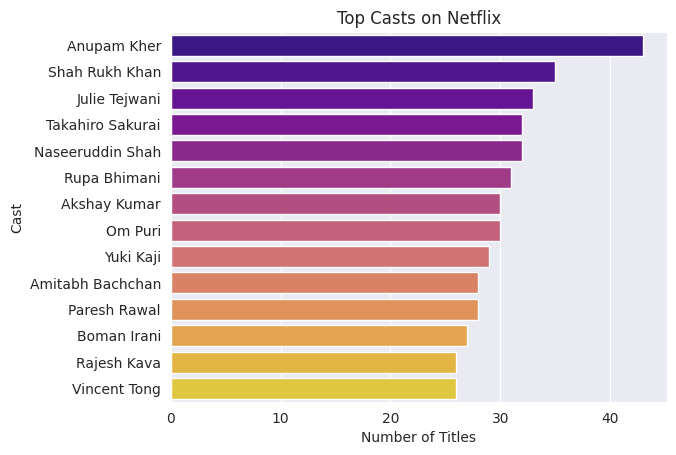

In [ ]:
sns.barplot(x='title', y='cast',hue='cast', palette='plasma', data=top_cast)
plt.title('Top Casts on Netflix')
plt.xlabel('Number of Titles')
plt.ylabel('Cast')
plt.show()

**Anupam Kher** has been in the highest number of titles released on netflix. Though not a main character, he is loved for his supporting actor role.

Similarly we can plot top`action  cast` or `action directors` on using categories listed_in `Action & Adventure` type of shows.

In [ ]:
top_action_cast = prep_df[prep_df['listed_in'] == "Action & Adventure"].groupby('cast')['title'].nunique().sort_values(ascending = False).reset_index().head(15)
top_action_cast.drop([0], axis=0, inplace=True)
# top_action_cast

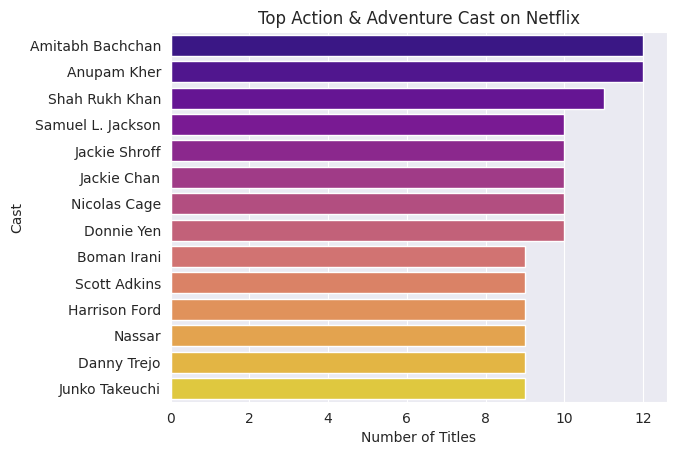

In [ ]:
sns.barplot(x='title', y='cast',hue='cast', palette='plasma', data=top_action_cast)
plt.title('Top Action & Adventure Cast on Netflix')
plt.xlabel('Number of Titles')
plt.ylabel('Cast')
plt.show()

**Amitabh Bachchan** is ranked one, and our favorite asian action hero **Jackie Chan** is ranked 3rd.

In [ ]:
top_director = prep_df.groupby('director')['title'].nunique().sort_values(ascending = False).reset_index(name='count').head(15)
top_director.drop([0], axis=0, inplace=True)
# top_director

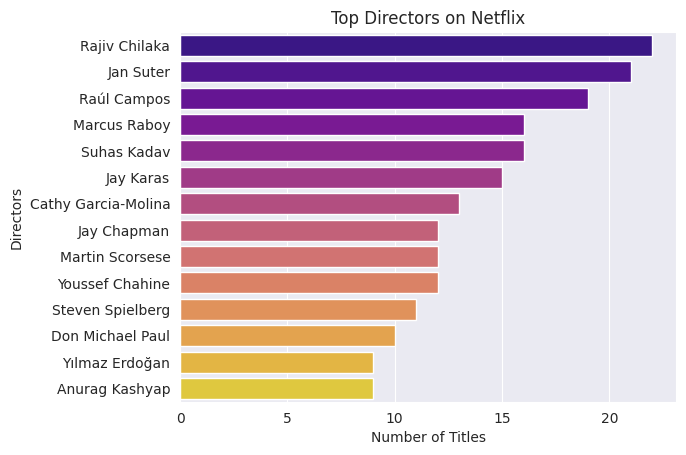

In [ ]:
sns.barplot(x='count', y='director',hue='director', palette='plasma', data=top_director)
plt.title('Top Directors on Netflix')
plt.xlabel('Number of Titles')
plt.ylabel('Directors')
plt.show()

Our **Top 3 directors** list contains:

1. Rajiv Chilaka
2. Jan Suter
3. Raul Campos


In [ ]:
director_actor = prep_df[['title', 'director', 'cast']]
# Removing rows where the 'director' or 'cast' is "Unknown"
df_cleaned = director_actor[(director_actor['director'] != 'Unknown') & (director_actor['cast'] != 'Unknown')]

# Group by the categorical columns and count the occurrences
top_director_actor = df_cleaned.groupby(['cast', 'director'])['title'].nunique().sort_values(ascending = False).reset_index(name='count').head(15)
top_director_actor #actor director pair

,cast,director,count
0,Julie Tejwani,Rajiv Chilaka,19
1,Rajesh Kava,Rajiv Chilaka,19
2,Jigna Bhardwaj,Rajiv Chilaka,18
3,Rupa Bhimani,Rajiv Chilaka,18
4,Vatsal Dubey,Rajiv Chilaka,16
5,Swapnil,Rajiv Chilaka,13
6,Mousam,Rajiv Chilaka,13
7,Saurav Chakraborty,Suhas Kadav,8
8,Satsuki Yukino,Toshiya Shinohara,7
9,Kappei Yamaguchi,Toshiya Shinohara,7


Simialrly, we plot for director and actor pair for a particular category.  we can filter our data with `listed_in` to that category.

### Q) How has the number of tiles released per year changed over the last 20-30 years?

To view this trend we will use `line plot`, an count the number of titles released per year.

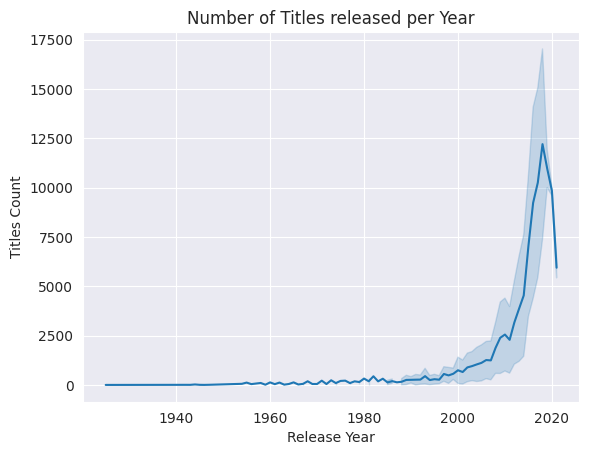

In [ ]:
release_df = prep_df.groupby(['type','release_year'])['title'].count().reset_index()
sns.lineplot(release_df, x='release_year', y='title')
plt.title('Number of Titles released per Year')
plt.xlabel('Release Year')
plt.ylabel('Titles Count')
plt.show()

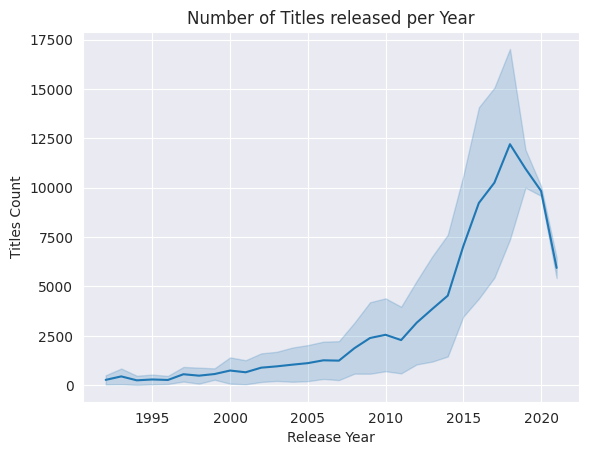

In [ ]:
release_df2 = prep_df[prep_df['release_year'] > 1991].groupby(['type','release_year'])['title'].count().reset_index()
sns.lineplot(release_df2, x='release_year', y='title')
plt.title('Number of Titles released per Year')
plt.xlabel('Release Year')
plt.ylabel('Titles Count')
plt.show()

Looking at the release year of titles of  **past 30 Years**, we can see that the count has increased by great number until after 2012. Which is followed by sharp **increase and decrease** of tiles between **2015 and 2021**.

### Q)Does Netflix has more focus on TV Shows than movies in recent years

Yes

In [ ]:
release_df3 = prep_df[prep_df['release_year'] > 2012].groupby(['type','release_year'])['title'].count().reset_index()
release_df3.tail(5)

,type,release_year,title
13,TV Show,2017,5447
14,TV Show,2018,7380
15,TV Show,2019,10005
16,TV Show,2020,10089
17,TV Show,2021,6459


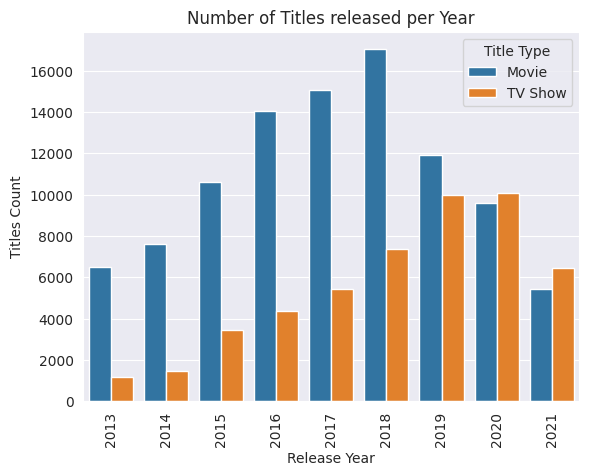

In [ ]:
sns.barplot(release_df3, x='release_year', y='title', hue='type')
plt.title('Number of Titles released per Year')
plt.xticks(rotation=90)
plt.xlabel('Release Year')
plt.ylabel('Titles Count')
plt.legend(title='Title Type')
plt.show()

Looking at the graph of release year and the Title released we can see that from 2012 the movie type have gone up until 2018 and then started decreasing unitll 2021.

The TV shows releases till kept on rise until 2020 at this point the number of TV show releases surpassed movies for that year.

All though both TV shows and movie release decreased following year mostly due to covid 19 which we could make out from the historical data. Covid lasted for 2 years starting from 2019 to 2021 which caused the  titles in production decreased, so did there releases decreased the following year.

### Comparison of TV Shows vs Movies
Lets first see the total number of Movies and TV Shows on Netflix.

We can plot this using seaborn's countplot on our original dataset `netflix_df`an count the number of Movies and TV Shows released.




counts, number of releases, count per country

-seperate bivariate analysis, duration and tv show

try plt.pcolor for horizontal barplot- tv v/s movies

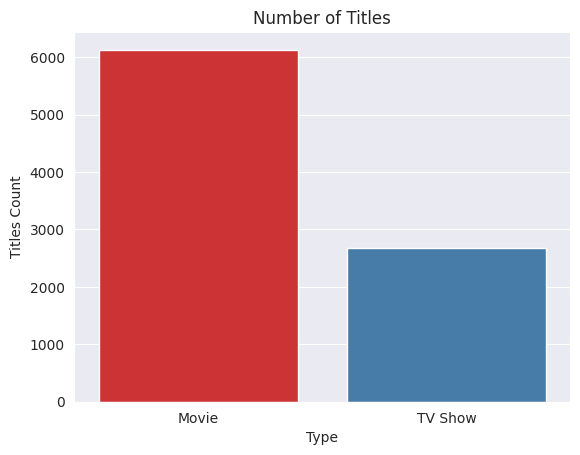

In [ ]:
ax = sns.countplot(data=netflix_df, x="type", hue='type', palette="Set1")
plt.title('Number of Titles')
plt.ylabel('Titles Count')
plt.xlabel('Type')
plt.show()

In [ ]:
netflix_df['type'].value_counts()

type
Movie      6131
TV Show    2676
Name: count, dtype: int64

The number or **Movies** released on Netflix is **6131** and that of **TV Shows** is **2676**

#### Top countries

In [ ]:
country_count = prep_df.groupby(['country'])['title'].count().sort_values(ascending = False).reset_index()
top_10_countries = country_count.head(11)
top_10_countries = top_10_countries[top_10_countries['country'] != 'Unknown']

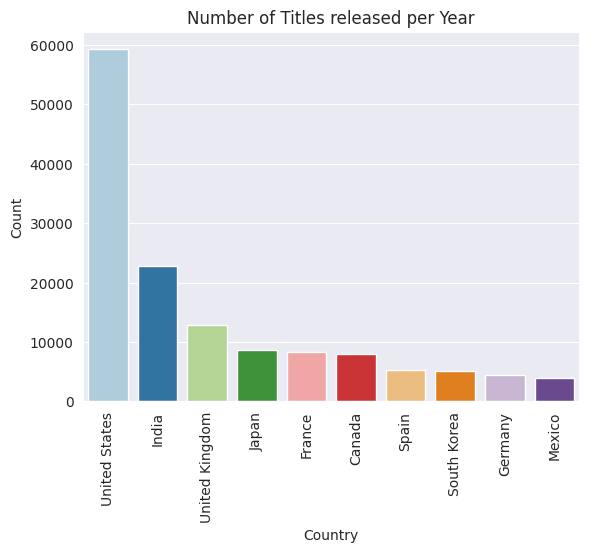

In [ ]:
sns.barplot(top_10_countries,x='country', y='title', hue='country', palette="Paired")
plt.title('Number of Titles released per Year')
plt.xticks(rotation=90)
plt.xlabel('Country')
plt.ylabel('Count')
plt.show()

Now lets view the number of Movies and TV shows released by the top 10 countries, This way we know what **type of title** the specify **country** prefers.

For this we will first get the dataframe with Type and country for each title, then get their total count to get the top ones. We will have to sort our dataframe for each type of title i.e. movies and tv shows and get our top 10 countries.


In [ ]:
country_count2 = prep_df.groupby(['type','country'])['title'].count().reset_index()
sorted_df = country_count2.sort_values(by=['type', 'title'], ascending=[True, False])
#top11 because it contains unknown value
type_sorted_df = sorted_df.groupby('type').head(11)
type_sorted_df = type_sorted_df[type_sorted_df['country'] != 'Unknown'] #removing unkwown value
# type_sorted_df

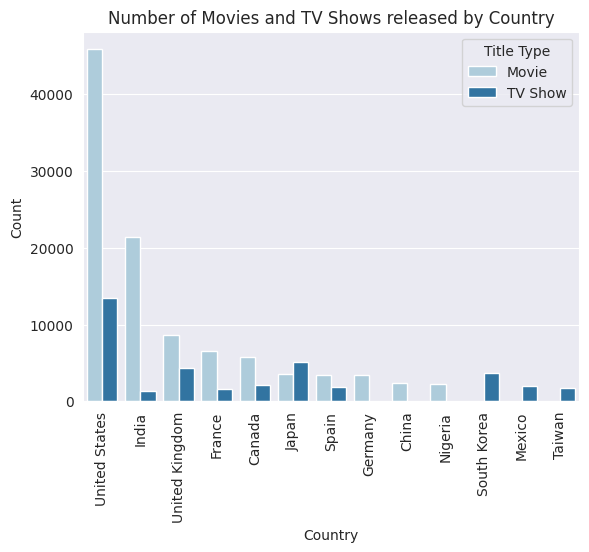

In [ ]:
sns.barplot(type_sorted_df, x="country", y="title", hue='type',palette="Paired")
plt.xticks(rotation=90)
plt.xlabel('Country')
plt.ylabel('Count')
plt.title('Number of Movies and TV Shows released by Country')
plt.legend(title='Title Type')
plt.show()

We will be using [Plotly express](https://plotly.com/python/plotly-express/), this is another great python library for visual analysis of data. Its enables interaction in plots.

We will use `sunburst` funtion to get values for each country, categorized by the type of title released on Netflix.

In [ ]:
fig = px.sunburst(type_sorted_df, path=['type', 'country'], values='title')
fig.show()

We can view that in **Movies** the countries **United States, India and UK** are the top three and in **TV shows** **United States, Japan and UK** are the top3 contributors.

With **US** having twice the number of releases compared toother top two countries.

#### Title Durations

To review the duration of Movies and TV shows we can directly filter data with respect to type and get the their respective duration histogram plot.
Here we are again using plotly as it gives nice histogram with an extra marginal box plot on top of it which could be used to get the median distribution of data.

In [ ]:
movies_df = prep_df[prep_df['type'] == "Movie"]
tv_shows_df = prep_df[prep_df['type'] == "TV Show"]

In [ ]:
def get_outliers(df, col):
  Q1 = df[col].quantile(0.25)
  Q3 = df[col].quantile(0.75)
  IQR = Q3 - Q1

  # Define outliers
  lower_bound = Q1 - 1.5 * IQR
  upper_bound = Q3 + 1.5 * IQR

  num_outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)].shape[0]
  num_lower_outliers = df[df[col] < lower_bound].shape[0]
  num_upper_outliers = df[df[col] > upper_bound].shape[0]
  return f"Total outliers: {num_outliers}, Lower bound outliers: {num_lower_outliers},Upper bound outliers: {num_upper_outliers}"

In [ ]:
movies_duration = movies_df.groupby('title')['duration'].first().reset_index()
tv_shows_duration = tv_shows_df.groupby('title')['duration'].first().reset_index()

In [ ]:
fig = px.histogram(movies_duration, x="duration", title='Movies Total Duration', marginal="box")
fig.show()

In [ ]:
print(get_outliers(movies_duration, "duration"))

Total outliers: 450, Lower bound outliers: 249,Upper bound outliers: 201


The **median** duration or the **runtime** of **movie** is **98 minutes** we have also found the number of outliers, there are total **450 outliers** with 249 below lower bond and 201 above upper bound.i.e. outside duration (46, 155)mins.

In [ ]:
fig = px.histogram(tv_shows_duration, x="duration", title='TV Shows Total Duration', marginal="box")
fig.show()

In [ ]:
print(get_outliers(tv_shows_duration, "duration"))

Total outliers: 254, Lower bound outliers: 0,Upper bound outliers: 254


The **median** duration or the number of season a **TV Show** has is **1 Season**, we have also found the number of outliers, there are total **254 outliers** all above upper bound. i.e. more than 3 seasons.

### Q) What is the best time to launch a TV show?



Let's view the **best time** to release a TV show
We will be analysing it with respect to the **month**, **day** on which it could be released.

Our data has the month column with the number representing the month so we are going to use a **map** function with apply to map the number to its month name.

In [ ]:
prep_df.head(3)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,day,week,month
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,Unknown,United States,2021-09-25,2020,PG-13,90,Documentaries,Saturday,38,9
1,s2,TV Show,Blood & Water,Unknown,Ama Qamata,South Africa,2021-09-24,2021,TV-MA,2,International TV Shows,Friday,38,9
2,s2,TV Show,Blood & Water,Unknown,Ama Qamata,South Africa,2021-09-24,2021,TV-MA,2,TV Dramas,Friday,38,9


In [ ]:
month_map = {
    1: 'Jan', 2: 'Feb', 3: 'Mar', 4: 'Apr', 5: 'May', 6: 'Jun',
    7: 'Jul', 8: 'Aug', 9: 'Sep', 10: 'Oct', 11: 'Nov', 12: 'Dec'
}

We are considering the **data only upto 2010** with **TV Shows**, cause beyond that there weren't much releases.

We will create a **pivot table** with index has a `month` and column representing `release year` and the values having the count for the number of releases.

In [ ]:
shows_per_month = tv_shows_df[tv_shows_df['release_year']>2010].groupby('release_year')['month'].value_counts().reset_index()
shows_per_month['month'] = shows_per_month['month'].apply(lambda x: month_map[x])
shows_per_month.tail(3)

,release_year,month,count
126,2021,Jan,299
127,2021,Nov,30
128,2021,Dec,15


In [ ]:
shows_pivot = shows_per_month.pivot(index='month', columns='release_year', values='count')
shows_pivot.head(3)

release_year,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
month,,,,,,,,,,,
Apr,18.0,55.0,159.0,110.0,441.0,421.0,474.0,454.0,868.0,738.0,541.0
Aug,161.0,81.0,117.0,239.0,221.0,369.0,305.0,811.0,969.0,615.0,910.0
Dec,170.0,271.0,241.0,87.0,411.0,692.0,370.0,1035.0,871.0,972.0,15.0


In [ ]:
#order indexes with reindex function.
month_order = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
shows_pivot = shows_pivot.reindex(month_order)
shows_pivot

release_year,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
month,,,,,,,,,,,
Jan,81.0,104.0,139.0,25.0,113.0,253.0,575.0,551.0,457.0,801.0,299.0
Feb,32.0,53.0,86.0,84.0,516.0,156.0,395.0,621.0,579.0,744.0,565.0
Mar,27.0,48.0,76.0,162.0,181.0,406.0,543.0,787.0,429.0,889.0,508.0
Apr,18.0,55.0,159.0,110.0,441.0,421.0,474.0,454.0,868.0,738.0,541.0
May,NaN,60.0,NaN,153.0,256.0,370.0,276.0,370.0,714.0,1049.0,602.0
Jun,19.0,38.0,58.0,110.0,263.0,351.0,434.0,527.0,962.0,925.0,1148.0
Jul,57.0,133.0,60.0,106.0,182.0,454.0,242.0,456.0,1143.0,1028.0,1085.0
Aug,161.0,81.0,117.0,239.0,221.0,369.0,305.0,811.0,969.0,615.0,910.0
Sep,5.0,75.0,68.0,78.0,248.0,375.0,763.0,603.0,745.0,783.0,756.0


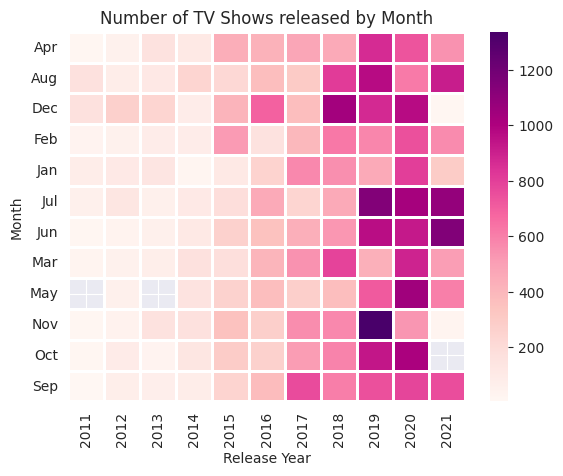

In [ ]:
sns.heatmap(shows_pivot,  cmap = 'RdPu', linewidth=1)
plt.xticks(rotation=90)
plt.yticks(rotation=360)
plt.title('Number of TV Shows released by Month')
plt.xlabel('Release Year')
plt.ylabel('Month')
plt.show()

In [ ]:
shows_pivot.loc[:, 2015:2021].mean(axis=1).sort_values(ascending = False).head()

month
Jun    658.571429
Jul    655.714286
Dec    623.714286
Sep    610.428571
Aug    600.000000
dtype: float64

Ploting it using heat map function we directly pass our shows pivot table.
Here we can infer that the number of releases are more heated around June July, December. Though November 2019 had peak number of releases.

We can confirm with the mean across months, with June having the highest average releases in recent years.

Similarly we can get the TV Shows **release** trend w.r.t to **day of week**.

we are gonna analyse that by having the pivot table for the release and the day on which it was released.

In [ ]:
tv_shows_df.columns

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'day', 'week',
       'month'],
      dtype='object')

In [ ]:
shows_daywise = tv_shows_df[tv_shows_df['release_year']>2010].groupby('release_year')['day'].value_counts().reset_index()
show_day_pivot = shows_daywise.pivot(index='release_year', columns='day', values='count')

In [ ]:
days = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
show_day_pivot = show_day_pivot.reindex(columns = days)
show_day_pivot

day,Monday,Tuesday,Wednesday,Thursday,Friday,Saturday,Sunday
release_year,,,,,,,
2011,95,126,44,94,47,80,113
2012,66,237,53,282,164,110,141
2013,173,247,138,70,203,202,163
2014,93,281,130,182,332,332,104
2015,370,370,478,373,856,803,226
2016,542,760,574,599,961,792,157
2017,501,944,417,566,2102,630,287
2018,541,702,590,639,3542,754,612
2019,604,923,956,1701,4857,570,394


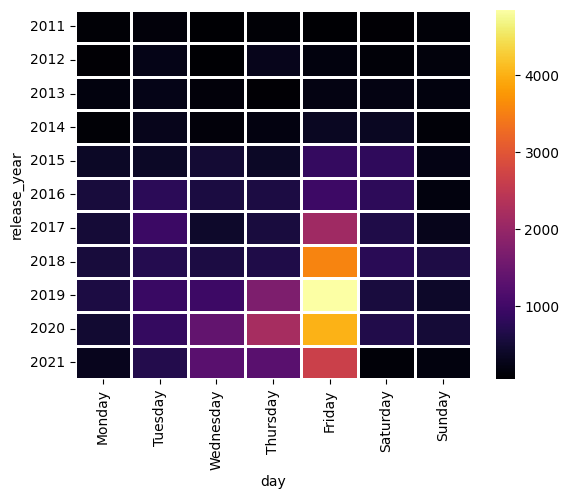

In [ ]:
sns.heatmap(show_day_pivot,  cmap = 'inferno', linewidth=1) # have year on x-axis and day on y-axis
plt.show()

In [ ]:
show_day_pivot.mean().sort_values(ascending = False)

day
Friday       1794.727273
Thursday      726.636364
Tuesday       556.545455
Wednesday     549.636364
Saturday      457.545455
Monday        339.909091
Sunday        260.727273
dtype: float64

we got the **heat map** using seaborn and we could see that **Friday** is clearly the winner. Netflix prefers to release new titles on Friday(Friyaay!).

Having **average** number of releases per year of **1794 titles**. Along side **Thursday** is the second preferred day of week for new releases.

Having imported the word cloud, we can visualize the most **frequently** listed categories/**genres** for released titles.

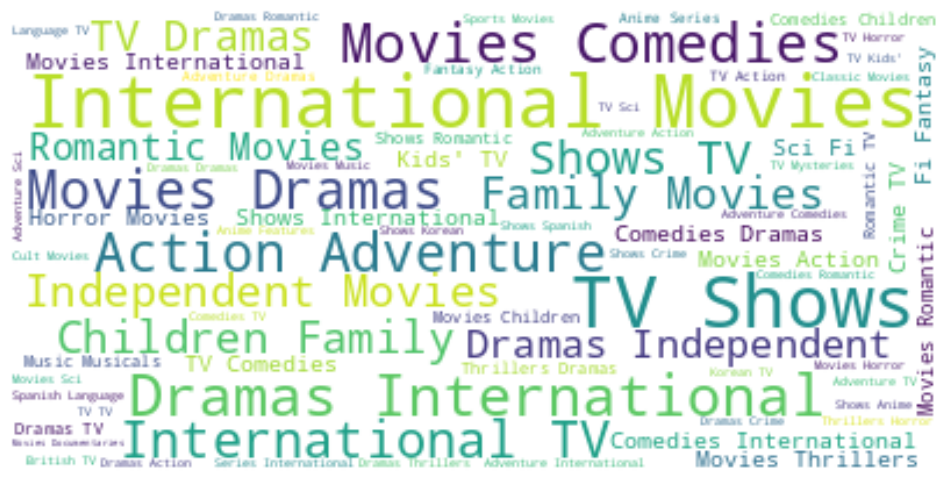

In [ ]:
text = ' '.join(prep_df['listed_in'])

# Generate the word cloud
wordcloud = WordCloud(background_color='white', repeat=False).generate(text)
plt.figure(figsize=(12,8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

Top type of contents are eye catching, large sized keywords.**Action Adventure, Comedy, Children,Dramas, Family**. Here we nelglected International Movies and TV Shows as they are general categories to list a title in for Movie & TV show respectively.

### Understanding what content is available in different countries

Types of content are indicated by the categories the titles are listed under in 'listed_in'. The more titles listed in a specific category, the more that content is preferred in a given country."

In [ ]:
shows_listed_in =  tv_shows_df[(tv_shows_df['release_year']>2014)].groupby('release_year')['listed_in'].value_counts().reset_index()
shows_listed_in

In [ ]:
# Group by 'listed_in' and calculate the total count for each category
top_categories = shows_listed_in.groupby('listed_in')['count'].sum().nlargest(11).index
top_categories = top_categories.drop(['International TV Shows'])
top_categories

Index(['TV Dramas', 'Crime TV Shows', 'TV Comedies', 'Kids' TV',
       'Romantic TV Shows', 'TV Action & Adventure',
       'Spanish-Language TV Shows', 'Anime Series', 'British TV Shows',
       'TV Mysteries'],
      dtype='object', name='listed_in')

In [ ]:
# Filter the DataFrame to include only the top 5 categories
shows_listed_in_top10 = shows_listed_in[shows_listed_in['listed_in'].isin(top_categories)]
# shows_listed_in_top10

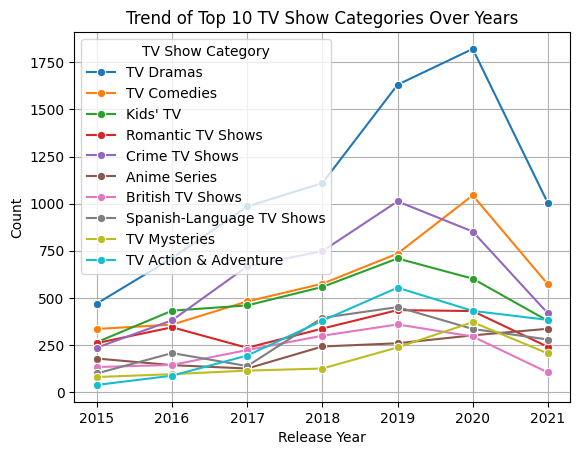

In [ ]:
sns.lineplot(data=shows_listed_in_top10, x='release_year', y='count', hue='listed_in', marker='o')
plt.title('Trend of Top 10 TV Show Categories Over Years')
plt.xlabel('Release Year')
plt.ylabel('Count')
plt.legend(title='TV Show Category')
plt.grid(True)
plt.show()

#### Content in India
We will first analyse the Indian TV show releases for which we will filter the data by country India. Group by data with respect to release year, then count the number of listed_in to get values for each category/genre, this gives us the categories count for each year.

In [ ]:
shows_listed_india = tv_shows_df[(tv_shows_df['release_year']>2014) & (tv_shows_df['country'] == "India")].groupby('release_year')['listed_in'].value_counts().reset_index()
shows_listed_india.sample(5)

,release_year,listed_in,count
50,2020,Reality TV,2
53,2021,International TV Shows,89
52,2021,TV Shows,198
0,2015,International TV Shows,40
55,2021,TV Comedies,11


In [ ]:
# Group by 'listed_in' and calculate the total count for each category
top_categories_india = shows_listed_india.groupby('listed_in')['count'].sum().nlargest(7).index
top_categories_india

Index(['International TV Shows', 'TV Dramas', 'TV Shows', 'TV Comedies',
       'Romantic TV Shows', 'Kids' TV', 'Crime TV Shows'],
      dtype='object', name='listed_in')

In [ ]:
#removing "International TV Shows", "TV Shows" as they are a more general terms instead of category/genre
categories_to_remove = ['International TV Shows', 'TV Shows']
top_categories_india = top_categories_india.drop(categories_to_remove)
top_categories_india

Index(['TV Dramas', 'TV Comedies', 'Romantic TV Shows', 'Kids' TV',
       'Crime TV Shows'],
      dtype='object', name='listed_in')

In [ ]:
# Filter the DataFrame to include only the top 5 categories
shows_listed_india_top5 = shows_listed_india[shows_listed_india['listed_in'].isin(top_categories_india)]
shows_listed_india_top5.head()

,release_year,listed_in,count
2,2015,TV Dramas,17
3,2015,Romantic TV Shows,16
5,2015,Kids' TV,10
7,2015,Crime TV Shows,8
8,2015,TV Comedies,2


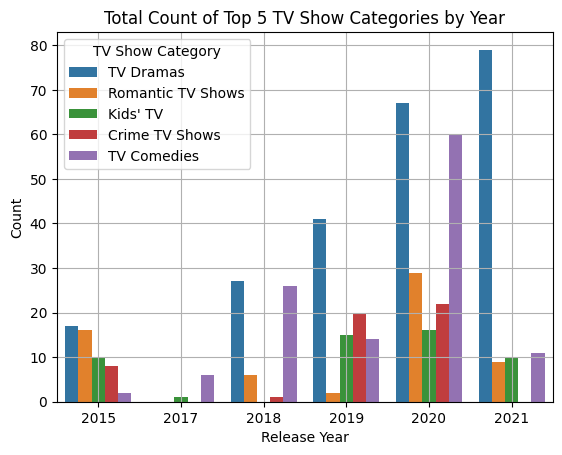

In [ ]:
sns.barplot(data=shows_listed_india_top5, x='release_year', y='count', hue='listed_in')
plt.title('Total Count of Top 5 TV Show Categories by Year')
plt.xlabel('Release Year')
plt.ylabel('Count')
plt.legend(title='TV Show Category')
plt.grid(True)
plt.show()

To get the heatmap, we transform our dataframe to pivot table.

In [ ]:
df_pivot_india = shows_listed_india_top5.pivot_table(index='release_year', columns='listed_in', values='count', fill_value=0)
df_pivot_india

listed_in,Crime TV Shows,Kids' TV,Romantic TV Shows,TV Comedies,TV Dramas
release_year,,,,,
2015,8,10,16,2,17
2017,0,1,0,6,0
2018,1,0,6,26,27
2019,20,15,2,14,41
2020,22,16,29,60,67
2021,0,10,9,11,79


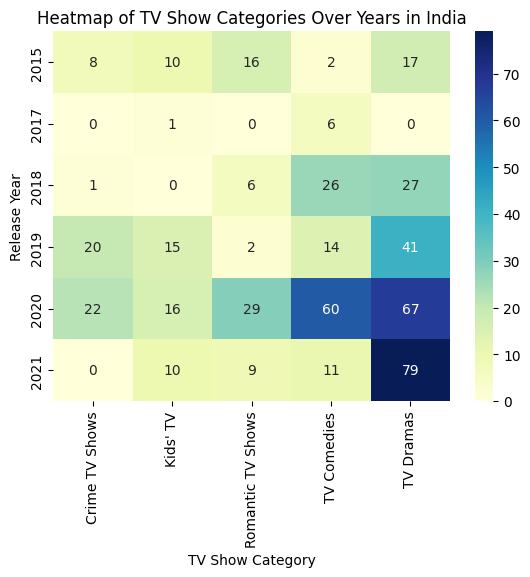

In [ ]:
sns.heatmap(df_pivot_india, annot=True, fmt="d", cmap="YlGnBu")
plt.title('Heatmap of TV Show Categories Over Years in India')
plt.xlabel('TV Show Category')
plt.ylabel('Release Year')
plt.show()

#### Content in US

Following similar steps we can analyse the content in **US**, the country have **most number of titles**.

In [ ]:
shows_listed_us = tv_shows_df[(tv_shows_df['release_year']>2014) & (tv_shows_df['country'] == "United States")].groupby('release_year')['listed_in'].value_counts().reset_index()
shows_listed_us.sample(5)

,release_year,listed_in,count
35,2016,TV Thrillers,8
133,2021,Stand-Up Comedy & Talk Shows,10
12,2015,British TV Shows,14
78,2019,TV Action & Adventure,304
42,2017,Kids' TV,147


In [ ]:
# Group by 'listed_in' and calculate the total count for each category
top_categories_us = shows_listed_us.groupby('listed_in')['count'].sum().nlargest(6).index
top_categories_us = top_categories_us.drop(['International TV Shows'])
top_categories_us

Index(['TV Dramas', 'TV Comedies', 'Kids' TV', 'Crime TV Shows',
       'TV Action & Adventure'],
      dtype='object', name='listed_in')

In [ ]:
shows_listed_us_top5 = shows_listed_us[shows_listed_us['listed_in'].isin(top_categories_us)]
shows_listed_us_top5.head()

,release_year,listed_in,count
0,2015,TV Comedies,138
1,2015,TV Dramas,94
2,2015,Kids' TV,83
7,2015,Crime TV Shows,42
20,2016,TV Dramas,153


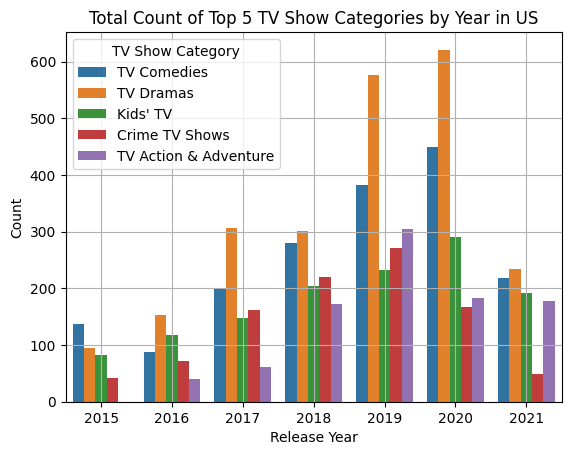

In [ ]:
sns.barplot(data=shows_listed_us_top5, x='release_year', y='count', hue='listed_in')
plt.title('Total Count of Top 5 TV Show Categories by Year in US')
plt.xlabel('Release Year')
plt.ylabel('Count')
plt.legend(title='TV Show Category')
plt.grid(True)
plt.show()

In [ ]:
df_pivot_us = shows_listed_us_top5.pivot_table(index='release_year', columns='listed_in', values='count', fill_value=0)
df_pivot_us

listed_in,Crime TV Shows,Kids' TV,TV Action & Adventure,TV Comedies,TV Dramas
release_year,,,,,
2015,42,83,0,138,94
2016,71,118,40,87,153
2017,162,147,62,200,306
2018,220,205,172,280,302
2019,271,233,304,383,576
2020,167,291,183,450,621
2021,49,191,177,218,234


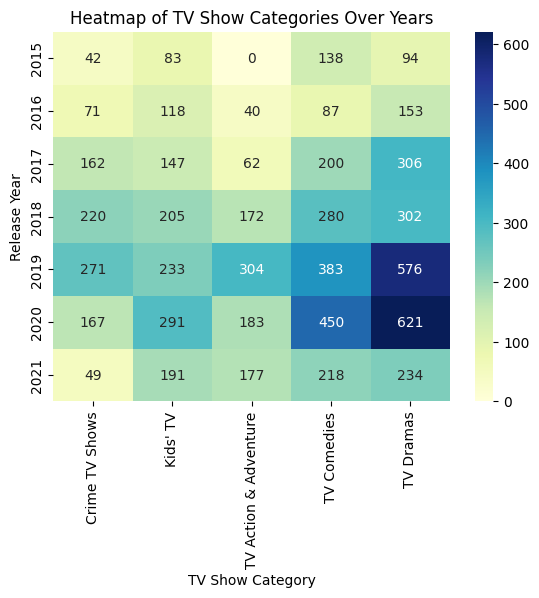

In [ ]:
sns.heatmap(df_pivot_us, annot=True, fmt="d", cmap="YlGnBu")
plt.title('Heatmap of TV Show Categories Over Years')
plt.xlabel('TV Show Category')
plt.ylabel('Release Year')
plt.show()

#### Content in Japan
We choose **Japan**, becomes it is famous for its **Anime series**, which continued to rise, as seen earlier.

We will follow similar steps for analysis. Here we are considering top **7 categories**, we know the top one, but we want to compare other categories in themselves to find out if any **other** trends are rising in Japan.   

In [ ]:
shows_listed_japan = tv_shows_df[(tv_shows_df['release_year']>2014) & (tv_shows_df['country'] == "Japan")].groupby('release_year')['listed_in'].value_counts().reset_index()
shows_listed_japan.sample(5)

,release_year,listed_in,count
24,2017,Kids' TV,15
20,2017,TV Comedies,31
40,2018,TV Action & Adventure,11
47,2019,TV Action & Adventure,20
7,2016,International TV Shows,137


In [ ]:
top_categories_japan = shows_listed_japan.groupby('listed_in')['count'].sum().nlargest(8).index
top_categories_japan = top_categories_japan.drop(['International TV Shows'])

In [ ]:
shows_listed_japan_top5 = shows_listed_japan[shows_listed_japan['listed_in'].isin(top_categories_japan)]
shows_listed_japan_top5.head()

,release_year,listed_in,count
0,2015,Anime Series,143
2,2015,Teen TV Shows,42
3,2015,Crime TV Shows,17
4,2015,TV Thrillers,9
5,2015,TV Dramas,9


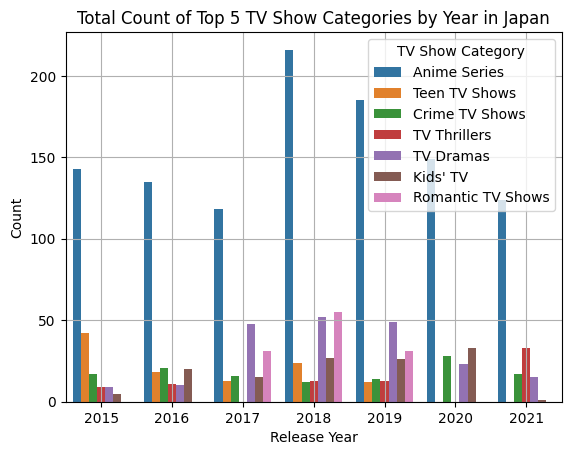

In [ ]:
sns.barplot(data=shows_listed_japan_top5, x='release_year', y='count', hue='listed_in')
plt.title('Total Count of Top 5 TV Show Categories by Year in Japan')
plt.xlabel('Release Year')
plt.ylabel('Count')
plt.legend(title='TV Show Category')
plt.grid(True)
plt.show()

In [ ]:
df_pivot_japan = shows_listed_japan_top5.pivot_table(index='release_year', columns='listed_in', values='count', fill_value=0)
df_pivot_japan

listed_in,Anime Series,Crime TV Shows,Kids' TV,Romantic TV Shows,TV Dramas,TV Thrillers,Teen TV Shows
release_year,,,,,,,
2015,143,17,5,0,9,9,42
2016,135,21,20,0,10,11,18
2017,118,16,15,31,48,0,13
2018,216,12,27,55,52,13,24
2019,185,14,26,31,49,13,12
2020,149,28,33,0,23,0,0
2021,124,17,1,0,15,33,0


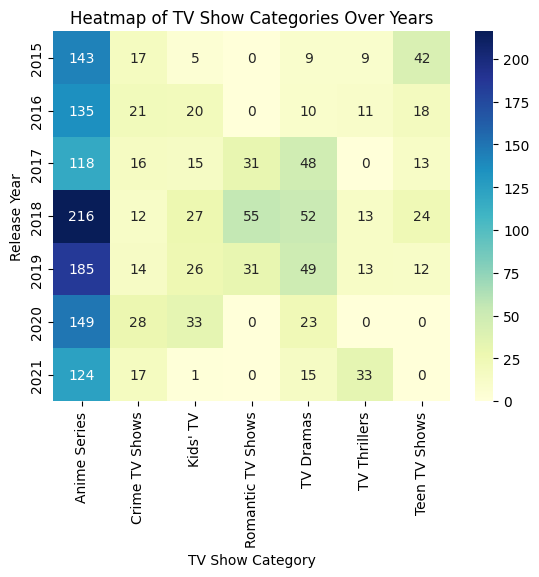

In [ ]:
sns.heatmap(df_pivot_japan, annot=True, fmt="d", cmap="YlGnBu")
plt.title('Heatmap of TV Show Categories Over Years')
plt.xlabel('TV Show Category')
plt.ylabel('Release Year')
plt.show()

As expected we can see **Anime Series** reaching **heights** in barplot w.r.t others and in Heatmap having **darkers** shades w.r.t others.

**TV Dramas** and **Romantic TV** shows had **gained interest**, but romantic TV shows completed failed to register new releases in following 2020.

**Teen TV shows** continued to **fall** from year 2015 which is even before general trend, finally failing to register new titles from from 2020, similar to romantic tv shows.

**Crime TV shows** are having **consistent** title releases.

## Business Insights

1) **Top Actors and Directors**
  - We had **top actors** from **India** dominating the list.
  - There was a **mix** of **directors** from different countries of origin.

2) **Title Releases**
  - The number of **title** releases showed a **decrease** towards the end of 2021.
  - The number of **TV show** releases **surpassed** the number of movie-type releases in **2020**. However, the total number of movie-type content remains higher than TV shows on Netflix.

3) **Content by Country**
  - Content from the **United States** is far greater than any other country, with **India** being the second largest content contributor. The USA's **content** is still three times more than India's content.
  - **Japan** and **South Korea** are the second and third largest in TV shows, with Japan's content being mostly **anime series**.

4) **Median Duration**
  - The median duration of **movie**-type content is **98 minutes**. There were many short films as well as long movies, with a few around 4 hours.
  - For **TV shows**, the median is **one season**, with many surpassing three seasons, the highest being 17 seasons.

5) **Best Release Time**
  - The best time to release a show is **June, July, and December**, with the preferred day being **Friday**.

6) **Popular Categories**
  - **TV drama** is the highest watched category, followed by TV comedy, British TV shows, and kid's TV.
  - In India, TV drama is highly watched, similar to the United States, which also has **TV comedies** closing in second. **Anime series** types are the most sought-after content in Japan.


## Recomendations
To grow business we need to follow the trend:

Try bringing **back the top** cast and direct for the particular genre to grow business

The most popular Times to release the content is **June, July and December**.

Releasing TV shows on **friday** gives the audience an ample time to watch it over the weekend

What usualy works is, try backing the **lost trends** when the current ones are falls. To **recycle** the whole trend as audience losses interest in watching the same genres and craves something new.

E.g.

1) **TV Comdies** in **India** Which had peaked interst near to TV dramas.

2)**Crime TV Shows** in **US**, which had a consist releases before fall.

3) **Romantic TV show** in **Japan** which lost traction in last two years.


### Future Work
1)We had deep analysis for TV Shows, we can similarly do the analysis for Movie type content.

2)We can futher use the title description from dataset and using NLP,analyse trends in storylines, Identify common topics on which content is delivered, and more.

3)Analyse other top country trends to better understand the coutry content type and more for growth in business.